<a href="https://colab.research.google.com/github/rachelresende/projeto-finan-as/blob/main/Projeto_de_Dados_de_Finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Realizando uma leitura de Dados das ações dos principais bancos americanos de 2006 a 2016.*




#Aqui realizei primeiro uma importação das principais bibliotecas que seriam utilizadas



In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import datetime
import yfinance as yf  # Import yfinance
import seaborn as sns
import matplotlib.pyplot as plt



Acessei eles através do Remote Data Access



In [ ]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)
BAC = yf.download("BAC", start, end)
C = yf.download("C", start, end)
GS = yf.download("GS", start, end)
JPM = yf.download("JPM", start, end)
MS = yf.download("MS", start, end)
WFC = yf.download("WFC", start, end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Escolhi quais seriam os bancos que seriam analisados em matéria de revisão e concatenei eles para ter uma visão mais holística do quadro histórico

In [ ]:
tickers = ['BAC','C','GS','JPM','MS']
bank_stocks = pd.concat([BAC,C,GS,JPM,MS], axis=1, keys=tickers)
bank_stocks.columns.names = ['BankTickers', 'StockInfo', 'Banks']
bank_stocks = bank_stocks.droplevel(level='Banks', axis=1)




# Análise Exploratória de Dados


# Aqui verifiquei que estávamos trabalhando em multiníveis, sendo assim, separei os 3 níveis, removi o duplicado e foquei no preço de fechamento das ações.
1. StockInfo
2. BankTickers

In [ ]:
bank_stocks.head()

BankTickers        BAC                                                      C  \
StockInfo        Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.370419  31.437050  30.750739  31.263805  16296700  324.013092   
2006-01-04   31.037230  31.477001  30.950607  31.317083  17757900  318.031097   
2006-01-05   31.077234  31.203837  30.864012  31.037257  14970700  319.608734   
2006-01-06   31.030588  31.257138  30.883997  31.183842  12599800  319.608734   
2006-01-09   31.050571  31.297112  30.890656  31.130532  15619400  318.096832   

BankTickers                                               ...        JPM  \
StockInfo          High         Low        Open   Volume  ...      Close   
Date                                                      ...              
2006-01-03   324.604713  316.256244  322.106750  1537600  ...  24.241709   
2006-01-04   322.764102  317.833897  321.186441  1870960  ...  24.101797   
2006-01-05   320.660495  318.162533  318.425473  1143160  ...  24.174797   
2006-01-06   321.449336  316.847812  321.317856  1370210  ...  24.345125   
2006-01-09   320.397595  317.505212  319.477294  1680740  ...  24.740541   

BankTickers                                                    MS             \
StockInfo         High        Low       Open    Volume      Close       High   
Date                                                                           
2006-01-03   24.344250  23.704881  24.024567  12838600  32.190910  32.290282   
2006-01-04   24.418126  23.980132  24.199129  13491500  32.212978  32.726399   
2006-01-05   24.217380  24.028798  24.095714   8109400  32.301331  32.345497   
2006-01-06   24.478957  24.059212  24.284291   7966900  32.334442  32.489020   
2006-01-09   24.770960  24.259967  24.259967  16575200  32.676727  32.731935   

BankTickers                                 
StockInfo          Low       Open   Volume  
Date                                        
2006-01-03   31.324168  31.561554  5377000  
2006-01-04   32.212978  32.406202  7977800  
2006-01-05   32.030820  32.323414  5778000  
2006-01-06   32.047368  32.444856  6889800  
2006-01-09   32.362050  32.367572  4144500  

[5 rows x 25 columns]

In [ ]:
bank_stocks.xs(key='Close', axis=1, level = "StockInfo").max()

,0
BankTickers,
BAC,37.937492
C,386.292664
GS,186.998825
JPM,53.933914
MS,50.462822


In [ ]:
returns = pd.DataFrame()
for tick in tickers:
  returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013812,-0.005772,0.000686
2006-01-05,0.001289,0.004961,-0.000393,0.003029,0.002743
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025
2006-01-09,0.000644,-0.004730,0.012031,0.016242,0.010586


<Axes: xlabel='Date'>

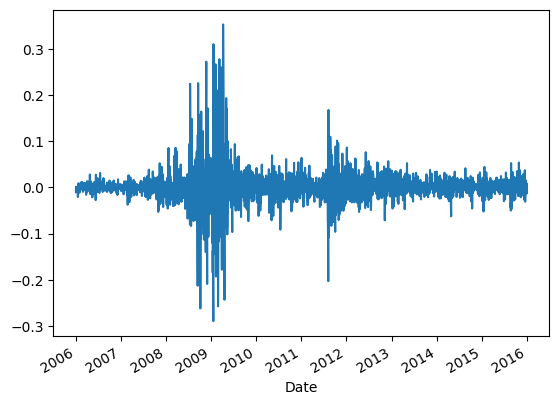

In [ ]:
returns['BACReturn'].plot()

<Axes: xlabel='Date'>

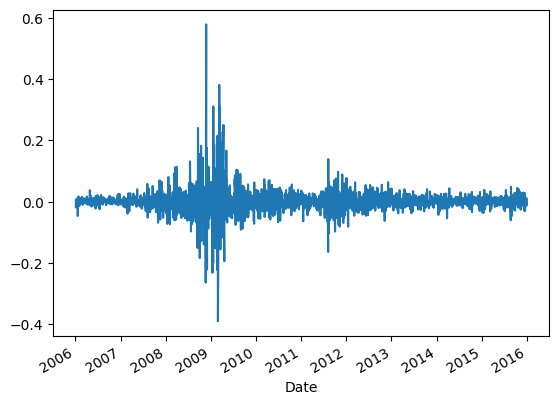

In [ ]:
returns['CReturn'].plot()

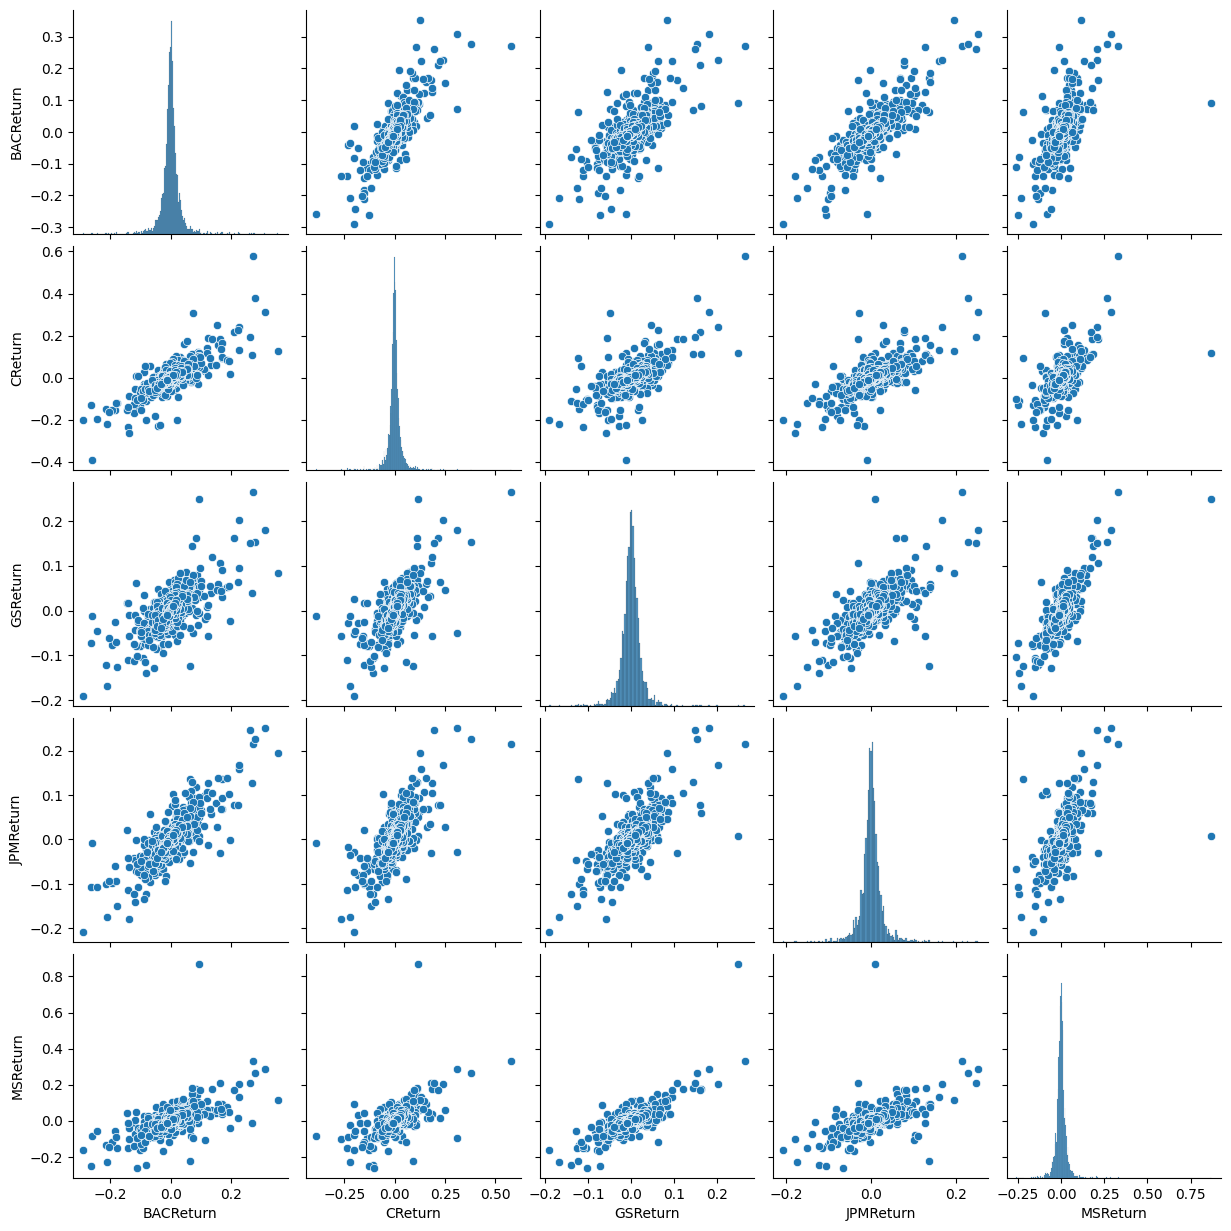

In [ ]:
sns.pairplot(returns[1:])

# interessante lembrar que dia 20 de janeiro foi a posse do presidente Obama nos EUA

In [ ]:
returns.idxmin()

,0
BACReturn,2009-01-20
CReturn,2009-02-27
GSReturn,2009-01-20
JPMReturn,2009-01-20
MSReturn,2008-10-09


In [ ]:
returns.idxmax()

,0
BACReturn,2009-04-09
CReturn,2008-11-24
GSReturn,2008-11-24
JPMReturn,2009-01-21
MSReturn,2008-10-13


#Quanto maior o retorno mais volátil é esse ativo, porque quanto maior a volatilidade de um ativo, maior a incerteza sobre o seu comportamento futuro. Isso significa que os preços do ativo podem variar de forma brusca e imprevisível.


In [ ]:
returns.std()

,0
BACReturn,0.036659
CReturn,0.038672
GSReturn,0.025386
JPMReturn,0.027675
MSReturn,0.037717


# **o ativo com a maior volatilidade foi o de C/MS**



In [ ]:
returns[(returns.index.date >= datetime.date(2015,1,1)) & (returns.index.date < datetime.date(2016,1,1))]
returns.std()

,0
BACReturn,0.036659
CReturn,0.038672
GSReturn,0.025386
JPMReturn,0.027675
MSReturn,0.037717




# grafico de distribuição MS RETURN

quando a a curva foge do padrão de distribuição, pode ser que você tenha encontrado algo que valha a pena estudar para ganhar dinheiro, dizemos que algo é "fora da curva" nesse caso

A curva de distribuição normal é uma distribuição de probabilidade que representa o comportamento de fenômenos aleatórios. É também conhecida como distribuição gaussiana.


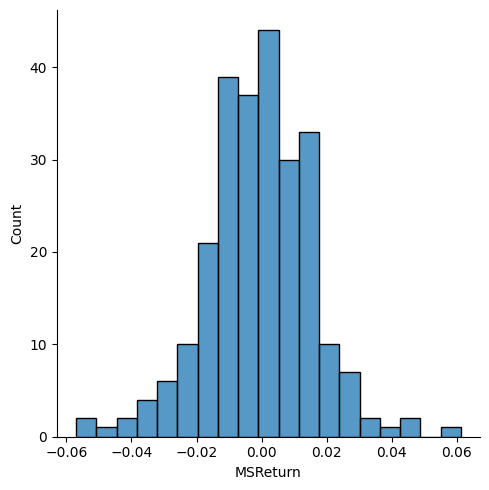

In [ ]:
sns.displot(returns[(returns.index.date >= datetime.date(2015,1,1)) & (returns.index.date < datetime.date(2016,1,1))]['MSReturn'])


In [ ]:
returns.head(50)

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013812,-0.005772,0.000686
2006-01-05,0.001289,0.004961,-0.000393,0.003029,0.002743
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025
2006-01-09,0.000644,-0.004730,0.012031,0.016242,0.010586
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507
2006-01-11,-0.002381,0.009064,-0.000454,-0.000737,0.010517
2006-01-12,-0.006507,0.001021,0.002122,-0.018427,-0.001679
2006-01-13,0.000000,-0.002243,0.007637,-0.000751,-0.001514


In [ ]:
  bank_stocks

BankTickers        BAC                                                      C  \
StockInfo        Close       High        Low       Open    Volume       Close   
Date                                                                            
2006-01-03   31.370419  31.437050  30.750739  31.263805  16296700  324.013092   
2006-01-04   31.037230  31.477001  30.950607  31.317083  17757900  318.031097   
2006-01-05   31.077234  31.203837  30.864012  31.037257  14970700  319.608734   
2006-01-06   31.030588  31.257138  30.883997  31.183842  12599800  319.608734   
2006-01-09   31.050571  31.297112  30.890656  31.130532  15619400  318.096832   
...                ...        ...        ...        ...       ...         ...   
2015-12-24   14.192422  14.282818  14.151331  14.233511  29369400   40.187355   
2015-12-28   14.077365  14.159545  13.954096  14.151327  41777500   39.935760   
2015-12-29   14.200640  14.258165  14.102023  14.175985  45670400   40.393200   
2015-12-30   14.011630  14.167772  14.003413  14.134901  35066400   39.874748   
2015-12-31   13.830832  14.028062  13.830832  13.978755  47153000   39.455421   

BankTickers                                                ...        JPM  \
StockInfo          High         Low        Open    Volume  ...      Close   
Date                                                       ...              
2006-01-03   324.604713  316.256244  322.106750   1537600  ...  24.241709   
2006-01-04   322.764102  317.833897  321.186441   1870960  ...  24.101797   
2006-01-05   320.660495  318.162533  318.425473   1143160  ...  24.174797   
2006-01-06   321.449336  316.847812  321.317856   1370210  ...  24.345125   
2006-01-09   320.397595  317.505212  319.477294   1680740  ...  24.740541   
...                 ...         ...         ...       ...  ...        ...   
2015-12-24    40.385587   39.989126   40.011998   4671200  ...  51.625504   
2015-12-28    40.080620   39.615541   40.080620   8761700  ...  51.454971   
2015-12-29    40.576183   40.210220   40.225466  10155100  ...  51.989830   
2015-12-30    40.362699   39.836628   40.286458   8763300  ...  51.617744   
2015-12-31    39.943372   39.455421   39.699397  11281800  ...  51.183662   

BankTickers                                                    MS             \
StockInfo         High        Low       Open    Volume      Close       High   
Date                                                                           
2006-01-03   24.344250  23.704881  24.024567  12838600  32.190910  32.290282   
2006-01-04   24.418126  23.980132  24.199129  13491500  32.212978  32.726399   
2006-01-05   24.217380  24.028798  24.095714   8109400  32.301331  32.345497   
2006-01-06   24.478957  24.059212  24.284291   7966900  32.334442  32.489020   
2006-01-09   24.770960  24.259967  24.259967  16575200  32.676727  32.731935   
...                ...        ...        ...       ...        ...        ...   
2015-12-24   51.850300  51.408460  51.641010   4468200  24.987904  25.164850   
2015-12-28   51.509232  50.935617  51.385210   6610600  24.749411  24.895586   
2015-12-29   52.168119  51.734027  51.811541   9820800  25.041761  25.157162   
2015-12-30   51.974322  51.509223  51.966569   7190700  24.795568  25.118689   
2015-12-31   51.765031  51.160409  51.307690  14654300  24.472452  24.849425   

BankTickers                                 
StockInfo          Low       Open   Volume  
Date                                        
2006-01-03   31.324168  31.561554  5377000  
2006-01-04   32.212978  32.406202  7977800  
2006-01-05   32.030820  32.323414  5778000  
2006-01-06   32.047368  32.444856  6889800  
2006-01-09   32.362050  32.367572  4144500  
...                ...        ...      ...  
2015-12-24   24.957130  25.057144  2798200  
2015-12-28   24.580160  24.895586  5420300  
2015-12-29   24.872510  24.957134  6388200  
2015-12-30   24.772489  25.003288  5057200  
2015-12-31   24.441680  24.549386  8154300  

[2517 rows x 25 columns]

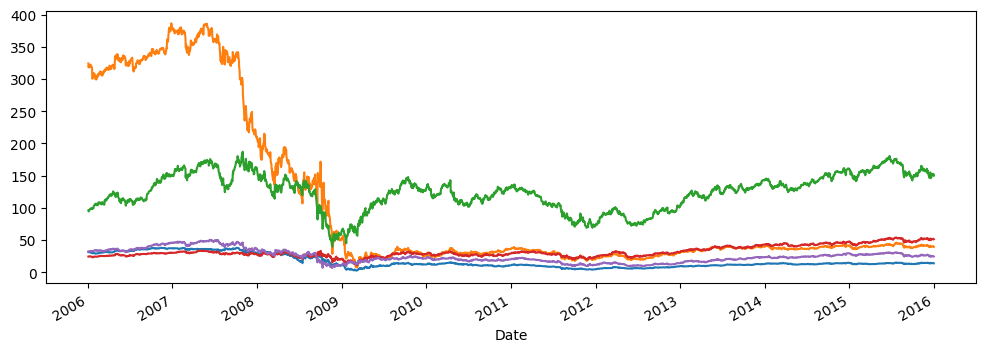

In [ ]:
 for tick in tickers:
  bank_stocks[tick]['Close'].plot(figsize=(12,4),label='tick')


# Visualização única dos 5 ativos

<Axes: xlabel='Date'>

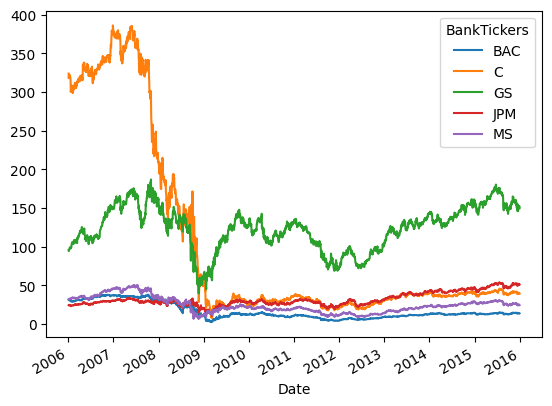

In [ ]:
bank_stocks.xs(key="Close",level="StockInfo", axis=1).plot()


# Médias Móveis
"A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo."

Abaixo fiz a visualização separada das linhas e também delas juntas, esse gráfico é bastante comum em análise de ações, pois ele mostra a média em relação ao real.



<Figure size 1200x600 with 0 Axes>

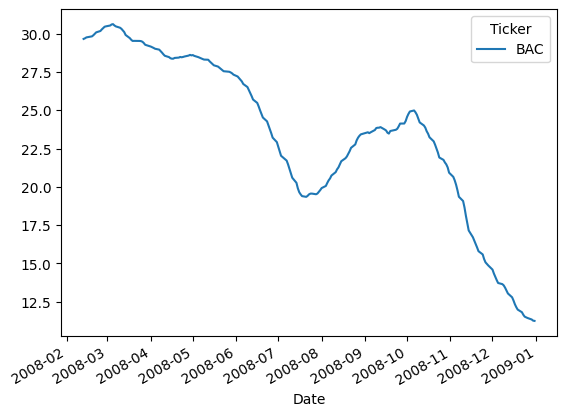

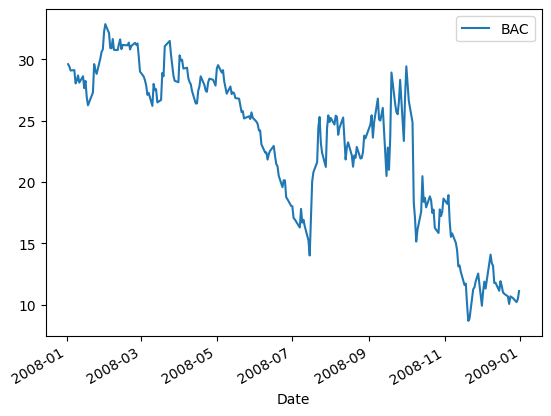

In [ ]:
plt.figure(figsize=(12,6))
BAC2008 = BAC['Close'][BAC.index.year==2008]
BAC2008_media_movel = BAC2008.rolling(window=30).mean().plot(label='media movel de 30d')
BAC2008.plot(label='fechamento')
plt.legend()

<Figure size 1200x600 with 0 Axes>

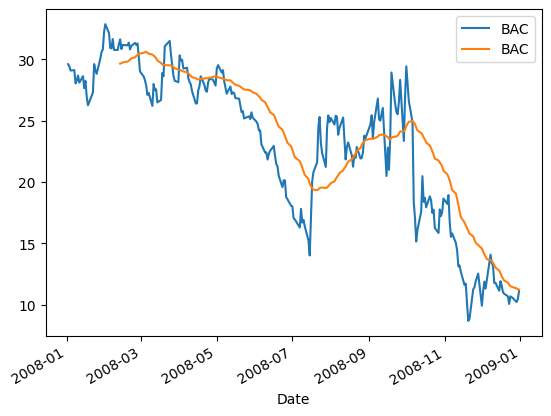

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# BAC2008 = BAC['Close'][BAC.index.year==2008]

# Plotar ambos os gráficos no mesmo objeto ax
ax = BAC2008.plot(label='fechamento')
BAC2008.rolling(window=30).mean().plot(ax=ax, label='media movel de 30d')

plt.legend()
plt.show()

In [ ]:
corr_matrix = bank_stocks.xs(key="Close",level="StockInfo", axis=1).corr()


<Axes: xlabel='BankTickers', ylabel='BankTickers'>

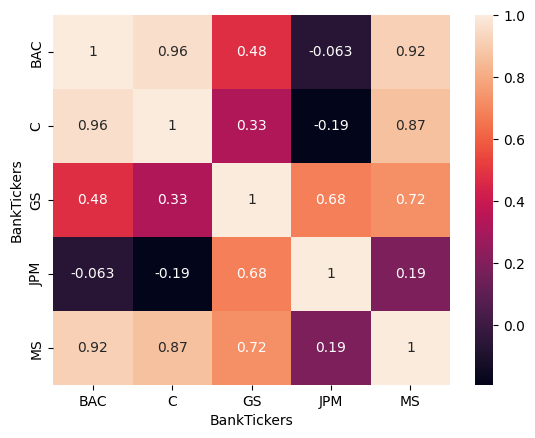

In [ ]:
sns.heatmap(corr_matrix, annot=True)


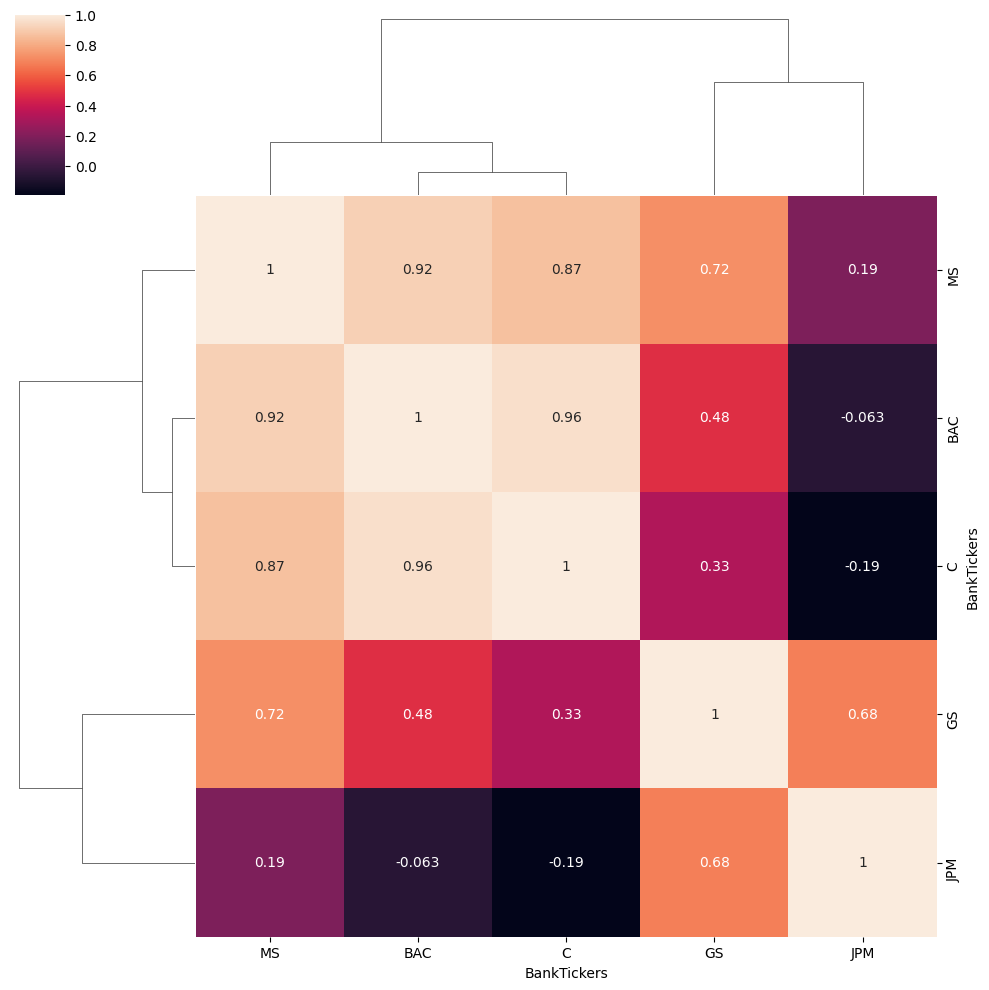

In [ ]:
sns.clustermap(corr_matrix, annot=True)
